# **Machine Learning for Budget Optimization: Predicting Total Bike Rentals to Enhance Cost Savings**

### **CONTEXT**
Capital Bike Sharing adalah sistem penyewaan sepeda yang ada di Washington DC , Amerika Serikat. Seluruh proses penyewaan sepeda mulai dari keanggotaan, penyewaan, dan pengembalian kembali, sudah menjadi otomatis. Melalui sistem ini, pengguna
dapat dengan mudah menyewa sepeda dari posisi tertentu stasiun Bike Sharing dan kembali lagi pada posisi atau Stasiun lain dari Capital Bike Sharing. 

### **PROBLEM**
Tantangan utama yang dihadapi oleh Capital Bike Sharing adalah melakukan ekspansi stasiun penyewaan sepeda ke kota-kota lain di luar Washington DC. Untuk melakukan ekspansi ini dengan efektif, **Capital Bike Sharing perlu prediksi potensi jumlah penyewa sepeda di kota-kota baru yang dituju**. Prediksi ini akan membantu dalam:

- Penghematan Anggaran: Dengan mengetahui predikasi jumlah penyewa sepeda yang diharapkan di kota baru, Capital Bike Sharing dapat mengalokasikan anggaran yang sesuai untuk persiapan operasional pengadaan sepeda, maintanace sepeda dan penentuan lokasi stasiun penyewaan yang optimal
### **GOALS**
**Membuat Model Machine Learning yang dapat memprediksi total penyewa sepeda untuk Penghematan Anggaran**

### **MATRICS EVALUATION**

Untuk mengukur kualitas suatu model dan melakukan evaluasi dalam konteks Machine Learning, kita memerlukan metrik evaluasi. Dalam model Machine Learning yang akan dikembangkan, kita akan menggunakan 3 matrcis evaluasi yaitu :

1. **RMSE (Root Mean Squared Error)**:
   - "RMSE (Root Mean Squared Error) adalah metrik yang mengukur sejauh mana model machine learning dapat memprediksi jumlah pengguna yang menyewa sepeda dengan akurat. Ini dihitung sebagai akar kuadrat dari rata-rata dari selisih antara nilai prediksi dan nilai sebenarnya. Semakin kecil RMSE, semakin baik model tersebut, karena menunjukkan bahwa kesalahan prediksi lebih mendekati nol."

2. **MAPE (Mean Absolute Percentage Error)**:
   - "MAPE (Mean Absolute Percentage Error) adalah metrik yang mengukur sejauh mana kesalahan prediksi model dalam bentuk persentase relatif terhadap jumlah sepeda yang sebenarnya disewa. Ini dihitung sebagai nilai absolut dari selisih persentase antara nilai prediksi dan nilai sebenarnya. MAPE digunakan dalam dunia bisnis karena lebih mudah diinterpretasi oleh pemangku kepentingan, karena memberikan gambaran langsung tentang persentase kesalahan dalam prediksi."

3. **R-squared (Koefisien Determinasi)**:
   - "R-squared (Koefisien Determinasi) adalah metrik yang mengukur sejauh mana variasi dalam data yang dapat dijelaskan oleh model. Nilai R-squared berkisar antara 0 hingga 1, di mana nilai 1 menunjukkan bahwa model dapat menjelaskan seluruh variasi dalam data. Dalam dunia bisnis, R-squared digunakan untuk menilai sejauh mana model cocok dengan data historis, dan semakin tinggi nilainya, semakin baik model tersebut dalam menjelaskan variasi dalam jumlah sepeda yang disewakan."

- Dalam konteks utama, kita akan menggunakan MAPE sebagai metrik evaluasi utama karena kemudahan interpretasinya. Namun, kita juga akan melibatkan RMSE dan R-squared untuk memberikan informasi tambahan tentang kualitas model kepada pemangku kepentingan.

### **STAKEHOLDERS**

1. Team Operational bagian pengadaan dan maintanance sepeda

## **DATA UNDERSTANDING**

Pada tahap data understanding adalah untuk mengetahui dan mengerti lebih dalam tentang data yang kita miliki.

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# Load Data
df = pd.read_csv('data_bike_sharing.csv')

| Nama Kolom | Deskripsi |
|------------|-----------|
| dteday     | Tanggal   |
| season     | Musim (1: winter, 2: spring, 3: summer, 4: fall) |
| hr         | Jam (0 hingga 23) |
| holiday    | Hari libur atau tidak |
| temp       | Suhu terstandarisasi dalam Celsius |
| atemp      | Suhu terstandarisasi perasaan dalam Celsius |
| hum        | Kelembaban terstandarisasi (dibagi dengan 100) |
| casual     | Jumlah pengguna kasual |
| registered | Jumlah pengguna terdaftar |
| cnt        | Jumlah total sepeda yang disewakan (termasuk pengguna kasual dan terdaftar) |
| weathersit | Kondisi cuaca (1: Cerah, Beberapa awan, Sebagian berawan, Sebagian berawan, 2: Berkabut + Mendung, Berkabut + Awan terputus-putus, Berkabut + Beberapa awan, Berkabut, 3: Salju ringan, Hujan ringan + Badai petir + Awan terbentuk, Hujan ringan + Awan terbentuk, 4: Hujan deras + Es pelet + Badai petir + Berkabut, Salju + Kabut) |

In [3]:
# Menampilkan 5 baris pertama pada dataframe
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [4]:
# info dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


- Terdapat 1265 baris dan 11 kolom
- tidak ada missing value

In [5]:
# Menampilkan gambaran informasi dari setiap Kolom
df_desc = []

for i in df.columns:
    df_desc.append([i,df[i].dtypes,
                    df[i].isna().sum(),
                    round((df[i].isna().sum()/len(df)*100),2),
                    df[i].nunique(),
                    df[i].sample(3).values])

df_deepInfo = pd.DataFrame(df_desc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])
df_deepInfo

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,dteday,object,0,0.0,731,"[2012-04-20, 2012-06-28, 2012-04-16]"
1,hum,float64,0,0.0,89,"[0.48, 0.23, 0.4]"
2,weathersit,int64,0,0.0,4,"[1, 1, 1]"
3,holiday,int64,0,0.0,2,"[0, 0, 0]"
4,season,int64,0,0.0,4,"[1, 3, 1]"
5,atemp,float64,0,0.0,65,"[0.303, 0.3333, 0.5]"
6,temp,float64,0,0.0,50,"[0.36, 0.74, 0.54]"
7,hr,int64,0,0.0,24,"[19, 11, 9]"
8,casual,int64,0,0.0,305,"[65, 1, 33]"
9,registered,int64,0,0.0,742,"[147, 50, 513]"


- seluruh kolom sudah memiliki tipe data integer dan float kecuali kolom dteday
- Kolom dteday masih berbentuk object dan perlu dirubah kedalam bentuk datetime

In [6]:
# Statistik Deskriptif
df.describe()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


Dari hasil statistik deskriptif dapat dilihat bahwa :
1. Kolom Cnt memiliki rentang nilai yang sangat jauh dari nilai 75% ke nilai maxnya

### **DATA CLEANING & FINDINGS ANOMALIES**

In [7]:
# merubah tipe data kolom dtday
df['dteday'] = pd.to_datetime(df['dteday'])

merubah tipe data dteday dari tipe object menjadi datetime

In [8]:
# Check Duplicated Value
df.duplicated().sum()

0

tidak ada data yang duplikat

In [9]:
# Mendapatkan daftar semua kolom
all_columns = df.columns.tolist()

# Hapus kolom dteday dari daftar kolom
subset_columns = all_columns.copy()
subset_columns.remove('dteday')

# Temukan baris yang duplikat berdasarkan kolom yang tersisa (tanpa kolom dteday)
duplicate_rows = df[df.duplicated(subset=subset_columns, keep=False)]
duplicate_rows

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
545,2012-10-26,0.88,2,0,4,0.5000,0.52,4,1,4,5
971,2012-07-26,0.74,1,0,3,0.6212,0.66,4,0,4,4
1221,2012-10-25,0.88,2,0,4,0.5000,0.52,4,1,4,5
1776,2011-12-03,0.65,1,0,4,0.2576,0.24,6,1,10,11
1924,2011-03-08,0.64,1,0,1,0.2727,0.22,4,0,2,2
2598,2012-07-30,0.83,1,0,3,0.6061,0.66,4,0,5,5
3082,2012-02-21,0.64,1,0,1,0.2727,0.22,4,0,2,2
3564,2012-03-07,0.56,1,0,1,0.2879,0.30,2,0,4,4
3935,2012-07-16,0.79,1,0,3,0.6364,0.68,3,2,4,6
5050,2012-02-29,0.56,1,0,1,0.2879,0.30,2,0,4,4


Terdapat data duplikat jika kita melihat tanpa kolom dteday terdapat baris data yang sama dan saya asumsikan bahwa data tersebut adalah duplikat dan harus di hapus agar model machine learning bisa belajar lebih baik tanpa data duplikat.

In [10]:
# Delete Duplicate Value
df.drop_duplicates(subset=subset_columns, keep='first', inplace=True)

Menghapus data duplikat

In [11]:
# melihat nama seluruh kolom
df.columns

Index(['dteday', 'hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp',
       'hr', 'casual', 'registered', 'cnt'],
      dtype='object')

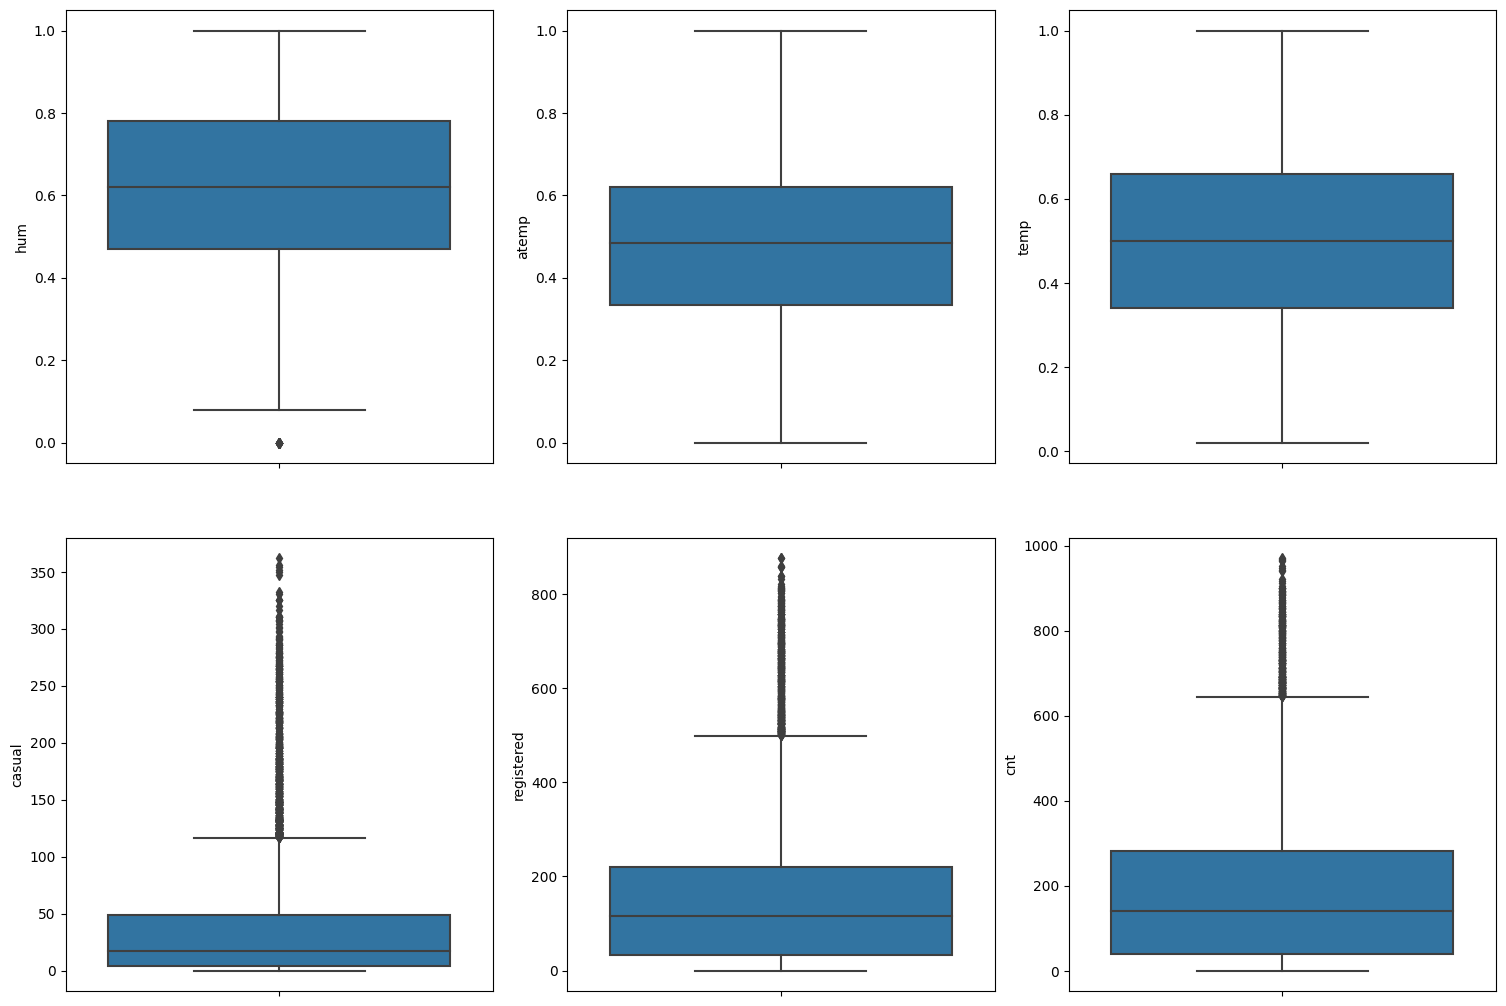

In [12]:
# Check Outliers
df_numeric = df.drop(['dteday','holiday','weathersit','season','hr'],axis=1).select_dtypes(include=[float, int]).columns

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()

for col in df_numeric:
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

plt.show()

Berdasarkan hasil Boxplot diatas :
1. Terdapat nilai Humadity yang '0' (berdasarkan domain Knowledge tingkat kelembapan '0' sangat jarang terjadi dibumi)
2. Kolom Target (cnt) memiliki distribusi yang tidak normal dan berbentuk Positiveliy Skewed

In [13]:
# Melihat Value Count pada kolom weathersit
df['weathersit'].value_counts()

weathersit
1    8061
2    3118
3     972
4       3
Name: count, dtype: int64

Terdapat perbandingan data yang jauh di weathersit 4 , ini dapat mempengaruhi kinerja machine learning dalam mempelajari data
- 4: Hujan deras + Es pelet + Badai petir + Berkabut, Salju + Kabut

In [14]:
# cek baris yang wheatersit 4
df[df['weathersit']== 4]

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
3208,2011-01-26,0.93,4,0,1,0.1970,0.22,16,1,35,36
11386,2012-01-09,0.86,4,0,1,0.2273,0.20,18,6,158,164
12079,2012-01-21,0.86,4,0,1,0.1364,0.14,1,1,22,23


saya asumsikan sebagai outliers karena disaat cuaca Hujan deras + Es pelet + Badai petir + Berkabut, Salju + Kabut , tidak memungkinkan untuk menggunakan sepeda

In [15]:
# Menampilkan nomor index weathersit yang memiliki data kategori nominal = 4 yang dianggap sebagai outliers
df[df['weathersit']==4].index

Index([3208, 11386, 12079], dtype='int64')

In [16]:
# Menghapus outliers dikolom weathersit
df.drop([3208, 11386, 12079],axis=0,inplace=True)

baris data yang memiliki weathersit 4 sudah terhapus

In [17]:
# Cek baris yang memiliki humadity '0'
df[df['hum']==0]

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
345,2011-03-10,0.0,3,0,1,0.3939,0.38,7,1,36,37
871,2011-03-10,0.0,3,0,1,0.4394,0.44,15,3,11,14
1645,2011-03-10,0.0,3,0,1,0.3182,0.34,0,3,0,3
3239,2011-03-10,0.0,2,0,1,0.4394,0.44,17,2,109,111
3717,2011-03-10,0.0,2,0,1,0.3333,0.34,22,4,30,34
4924,2011-03-10,0.0,3,0,1,0.3333,0.36,6,0,12,12
7285,2011-03-10,0.0,3,0,1,0.3182,0.34,1,0,2,2
7760,2011-03-10,0.0,3,0,1,0.4242,0.42,12,4,30,34
8412,2011-03-10,0.0,3,0,1,0.3939,0.38,8,1,43,44
8960,2011-03-10,0.0,3,0,1,0.3485,0.34,23,1,26,27


Berdasarkan Domain Knowledge nilai Humadity 0 adalah hampir tidak terjadi dibumi dan tidak wajar

In [18]:
# cek median dari humadity berdasarkan wheatersit dan season
median_values = df.groupby(['weathersit','season'])['hum'].median()
median_values

weathersit  season
1           1         0.500
            2         0.570
            3         0.600
            4         0.610
2           1         0.650
            2         0.755
            3         0.730
            4         0.710
3           1         0.870
            2         0.870
            3         0.840
            4         0.880
Name: hum, dtype: float64

hasil diatas adalah , hasil median dari Humadity berdasarkan wheatersit dan season

In [19]:
# Mengisi nilai kelembapan yang 0 dengan median berdasarkan season dan weathersit
df['hum'] = df.groupby(['season', 'weathersit'])['hum'].transform(lambda x: x.replace(0, x.median()))

nilai tingkat kelembapan 0 saya ganti dengan menggunakan nilai median Humadity berdasarkan wheatersit dan season

In [20]:
# Cek nilai humadity yang sudah diganti
df.loc[[345,   871,  1645,  3239,  3717,  4924,  7285,  7760,  8412,  8960,9186,  9651, 10715, 11766]]

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
345,2011-03-10,0.87,3,0,1,0.3939,0.38,7,1,36,37
871,2011-03-10,0.87,3,0,1,0.4394,0.44,15,3,11,14
1645,2011-03-10,0.87,3,0,1,0.3182,0.34,0,3,0,3
3239,2011-03-10,0.65,2,0,1,0.4394,0.44,17,2,109,111
3717,2011-03-10,0.65,2,0,1,0.3333,0.34,22,4,30,34
4924,2011-03-10,0.87,3,0,1,0.3333,0.36,6,0,12,12
7285,2011-03-10,0.87,3,0,1,0.3182,0.34,1,0,2,2
7760,2011-03-10,0.87,3,0,1,0.4242,0.42,12,4,30,34
8412,2011-03-10,0.87,3,0,1,0.3939,0.38,8,1,43,44
8960,2011-03-10,0.87,3,0,1,0.3485,0.34,23,1,26,27


Nilai Humadity yang '0' sudah diganti dengan nilai median berdasarkan season dan wheatersit

### **Ringkasan Data Cleaning**

1. Menghapus data duplikat (terdapat data duplikat jika tidak melihat kolom dteday)
2. Mengganti nilai Humadity (tingkat kelembapan) yang 0 berdasarkan median Humadity dari season dan wheatersit
2. Menghapus kolom baris wheatersit 4 (yang memiliki 3 baris data ) karena pada cuaca tersebut yaitu (Hujan deras + Es pelet + Badai petir + Berkabut, Salju + Kabut) saya asumsikan tidak ada yang mengendarai sepeda karena tidak memungkinkan pada cuaca tersebut

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 12164
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12151 non-null  datetime64[ns]
 1   hum         12151 non-null  float64       
 2   weathersit  12151 non-null  int64         
 3   holiday     12151 non-null  int64         
 4   season      12151 non-null  int64         
 5   atemp       12151 non-null  float64       
 6   temp        12151 non-null  float64       
 7   hr          12151 non-null  int64         
 8   casual      12151 non-null  int64         
 9   registered  12151 non-null  int64         
 10  cnt         12151 non-null  int64         
 11  date        12151 non-null  int32         
 12  month       12151 non-null  int32         
 13  year        12151 non-null  int32         
 14  day_name    12151 non-null  int64         
 15  weekday     12151 non-null  int64         
dtypes: datetime64[ns](1), float

### **MENAMBAH KOLOM FITUR**

In [21]:
# Membuat kolom tanggal
df['date'] = df['dteday'].dt.day

In [22]:
# Membuat kolom bulan
df['month'] = df['dteday'].dt.month

In [23]:
# Membuat kolom tahun
df['year'] = df['dteday'].dt.year

In [24]:
# Membuat kolom nama hari
df['day_name'] = df['dteday'].dt.strftime('%A')

In [25]:
# membuat kolom hari kerja
df['weekday'] = 1

# Kemudian ubah nilai menjadi 0 jika 'day_name' adalah 'Saturday' atau 'Sunday'
df.loc[(df['day_name'] == 'Saturday') | (df['day_name'] == 'Sunday'), 'weekday'] = 0

melakukan penambahan fitur dari kolom 'dteday yaitu Hari, Bulan , tahun, hari kerja dan nama hari :
1. untuk melihat total jumlah pengguna penyewa sepeda berdasarkan tanggal 
2. untuk memperkaya fitur untuk proses pembelajaran Machine Learningnya

### **EDA & FEATURED SELECTION**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 12164
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12151 non-null  datetime64[ns]
 1   hum         12151 non-null  float64       
 2   weathersit  12151 non-null  int64         
 3   holiday     12151 non-null  int64         
 4   season      12151 non-null  int64         
 5   atemp       12151 non-null  float64       
 6   temp        12151 non-null  float64       
 7   hr          12151 non-null  int64         
 8   casual      12151 non-null  int64         
 9   registered  12151 non-null  int64         
 10  cnt         12151 non-null  int64         
 11  date        12151 non-null  int32         
 12  month       12151 non-null  int32         
 13  year        12151 non-null  int32         
 14  day_name    12151 non-null  object        
 15  weekday     12151 non-null  int64         
dtypes: datetime64[ns](1), float

data yang sudah dicleaned :
1. menjadi 12151 baris dan 16 kolom

In [27]:
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,date,month,year,day_name,weekday
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,9,12,2011,Friday,1
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,17,6,2012,Sunday,0
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,15,6,2011,Wednesday,1
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,31,3,2012,Saturday,0
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,31,7,2012,Tuesday,1


menampilkan 5 data teratas yang sudah bersih dan sudah terdapat tambahan kolom fitur

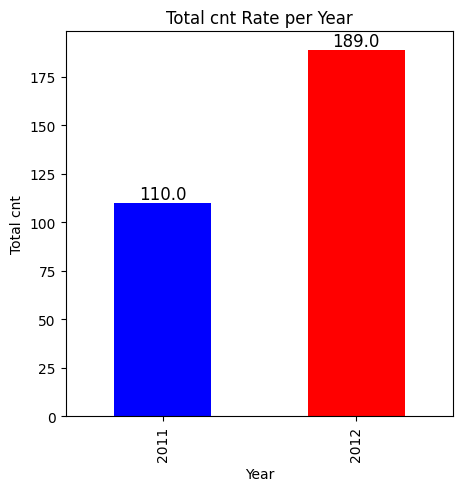

In [28]:
plt.figure(figsize=(5, 5))

# Mengelompokkan berdasarkan 'year' dan menghitung median 'cnt'
yearly_cnt = df.groupby('year')['cnt'].median()

# Membuat grafik batang
ax = yearly_cnt.plot(kind='bar', color=['blue', 'red'])

# Menampilkan angka di atas setiap batang
for i, v in enumerate(yearly_cnt):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

# Label sumbu dan judul
plt.xlabel('Year')
plt.ylabel('Total cnt')
plt.title('Total cnt Rate per Year')

# Menampilkan grafik
plt.show()

Terdapat kenaikan total penyewa sepeda ditahun 2012 , berdasarkan hal tersebut dapat diasumsikan bahwa pada pergantian tahun terjadi peningkatan pengguna penyewaan sepeda 

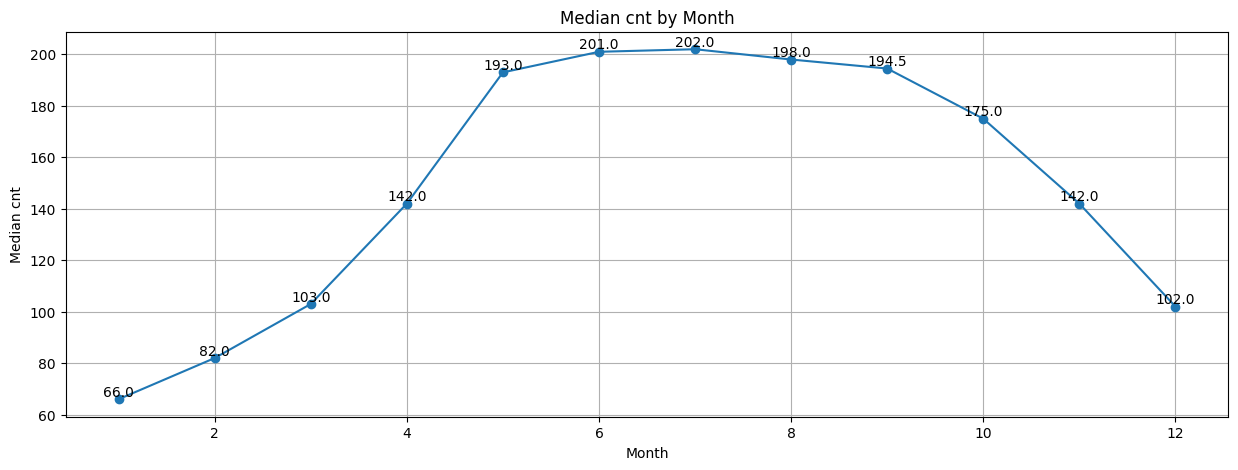

In [29]:
plt.figure(figsize=(15,5))

median_cnt_by_month = df.groupby('month')['cnt'].median()

# Membuat grafik garis
plt.plot(median_cnt_by_month.index, median_cnt_by_month.values, marker='o', linestyle='-')

# Menampilkan angka di setiap titik data
for i, median in enumerate(median_cnt_by_month.values):
    plt.text(median_cnt_by_month.index[i], median, str(median), ha='center', va='bottom')

# Label sumbu dan judul
plt.xlabel('Month')
plt.ylabel('Median cnt')
plt.title('Median cnt by Month')

# Menampilkan grid
plt.grid(True)

# Menampilkan grafik
plt.show()


Berdasarkan Line plot Median cnt by Month , dapat disimpulkan bahwa Puncak pengguna penyewa sepeda terdapat pada bulan Mei hingga bulan september. 

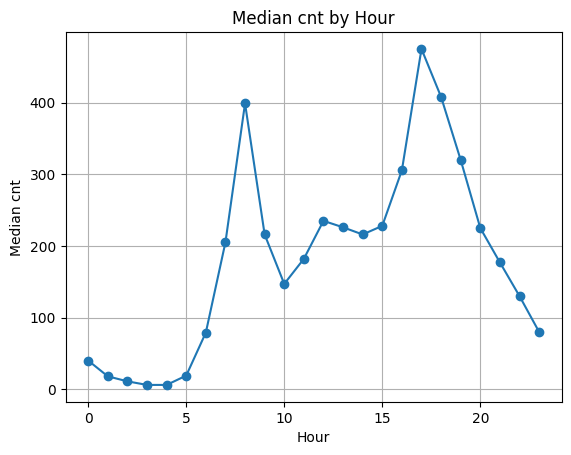

In [30]:
median_cnt_by_hr = df.groupby('hr')['cnt'].median()

# Membuat grafik garis
plt.plot(median_cnt_by_hr.index, median_cnt_by_hr.values, marker='o', linestyle='-')

# Label sumbu dan judul
plt.xlabel('Hour')
plt.ylabel('Median cnt')
plt.title('Median cnt by Hour')

# Menampilkan grid
plt.grid(True)

# Menampilkan grafik
plt.show()

Berdasarkan Lineplot diatas dapat disimpulkan bahwa Puncak penggunaan penyewa sepeda berada pada jam 8 pagi dan dijam 17.00 sore hari

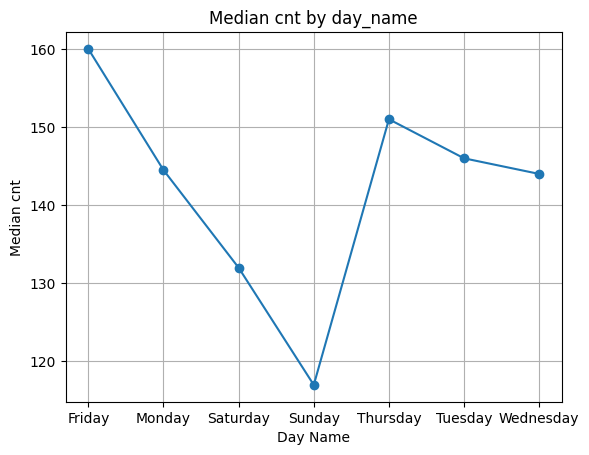

In [31]:
median_cnt_by_hr = df.groupby('day_name')['cnt'].median()

# Membuat grafik garis
plt.plot(median_cnt_by_hr.index, median_cnt_by_hr.values, marker='o', linestyle='-')

# Label sumbu dan judul
plt.xlabel('Day Name')
plt.ylabel('Median cnt')
plt.title('Median cnt by day_name')

# Menampilkan grid
plt.grid(True)

# Menampilkan grafik
plt.show()

Berdasarkan Lineplot diatas dapat disimpulkan bahwa Puncak penggunaan penyewa sepeda berada dihari jumat dan titik terendahnya ada di hari minggu

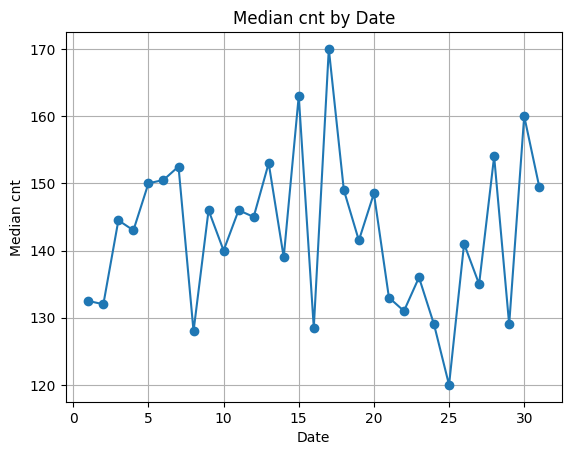

In [32]:
median_cnt_by_date = df.groupby('date')['cnt'].median()

# Membuat grafik garis
plt.plot(median_cnt_by_date.index, median_cnt_by_date.values, marker='o', linestyle='-')

# Label sumbu dan judul
plt.xlabel('Date')
plt.ylabel('Median cnt')
plt.title('Median cnt by Date')

# Menampilkan grid
plt.grid(True)

# Menampilkan grafik
plt.show()

Terdapat Pola total jumlah penyewa sepeda berdasarkan Tanggal

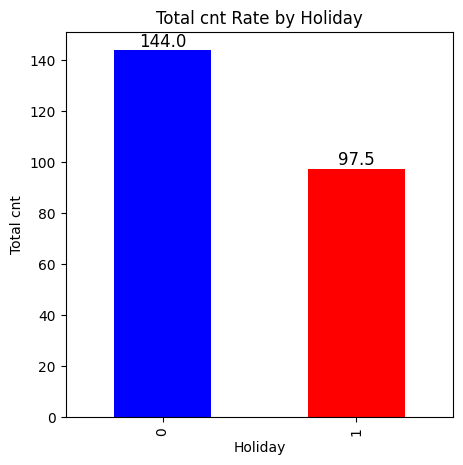

In [33]:
plt.figure(figsize=(5, 5))

# Mengelompokkan berdasarkan 'holiday' dan menghitung jumlah 'cnt'
holiday_cnt = df.groupby('holiday')['cnt'].median()

# Membuat grafik batang
ax = holiday_cnt.plot(kind='bar', color=['blue', 'red'])

# Menampilkan angka di atas setiap batang
for i, v in enumerate(holiday_cnt):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

# Label sumbu dan judul
plt.xlabel('Holiday')
plt.ylabel('Total cnt')
plt.title('Total cnt Rate by Holiday')

# Menampilkan grafik
plt.show()

Berdasarkan barchart diatas dapat disimpulkan bahwa pengguna sewa sepeda paling banyak bukan dihari libur

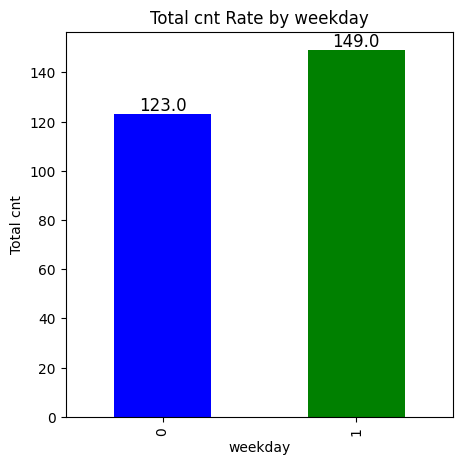

In [34]:
plt.figure(figsize=(5, 5))

# Mengelompokkan berdasarkan 'weekday' dan menghitung jumlah 'cnt'
holiday_cnt = df.groupby('weekday')['cnt'].median()

# Membuat grafik batang dengan warna yang berbeda
ax = holiday_cnt.plot(kind='bar', color=['blue', 'green'])

# Menampilkan angka di atas setiap batang
for i, v in enumerate(holiday_cnt):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

# Label sumbu dan judul
plt.xlabel('weekday')
plt.ylabel('Total cnt')
plt.title('Total cnt Rate by weekday')

# Menampilkan grafik
plt.show()


Berdasarkan barchart diatas dapat disimpulkan bahwa rata-rata pengguna sewa sepeda paling banyak dihari kerja , tetapi dihari weekend juga masih menunjukan angka yang signifikan 

<function matplotlib.pyplot.show(close=None, block=None)>

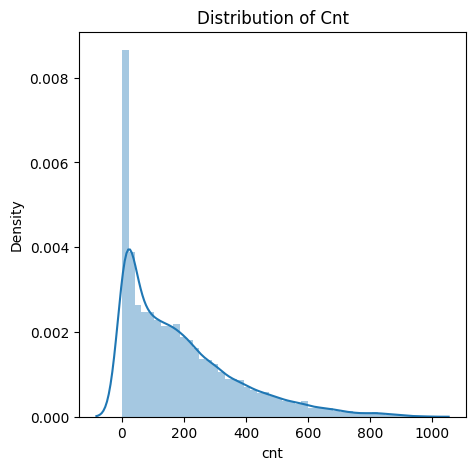

In [107]:
warnings.filterwarnings("ignore", category=UserWarning)

plt.figure(figsize=(5,5))
sns.distplot(df['cnt'])
plt.title('Distribution of Cnt')
plt.show

Dari Displot diatas dapat kita lihat bahwa distribusi pada kolom 'cnt' memiliki distribusi yang tidak normal dan berbentuk positively skewed.

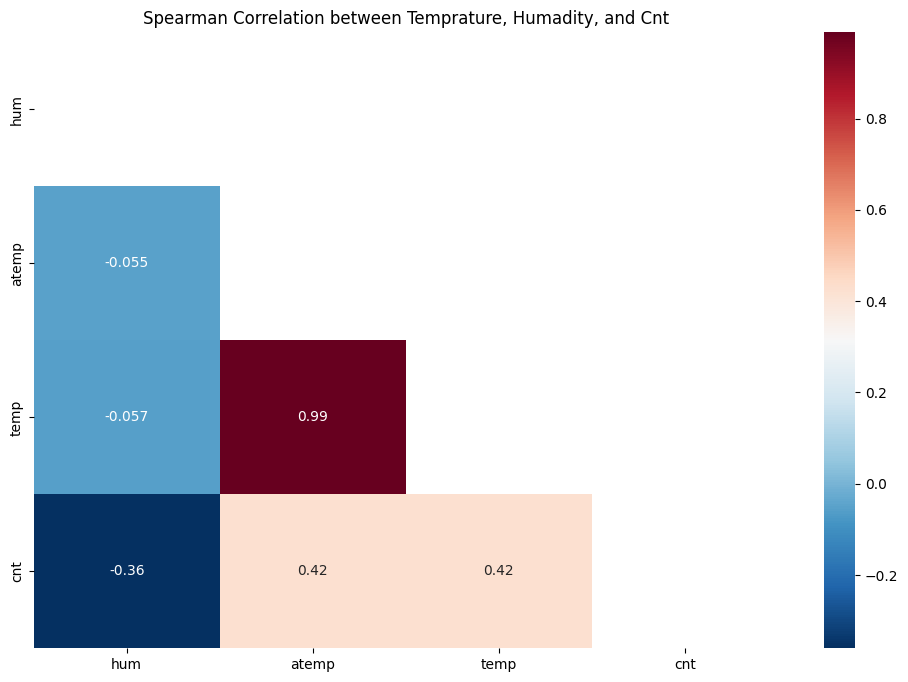

In [106]:
# Mengambil hanya kolom-kolom numerik dari DataFrame df
df_numeric = df[['hum','atemp','temp','cnt']]

# Menghitung korelasi Spearman
corr_spearman = df_numeric.corr(method='spearman')

# Mengubah elemen-elemen di bawah diagonal utama menjadi NaN
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

# Membuat Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_spearman, cmap="RdBu_r", annot=True, mask=mask)

plt.title('Spearman Correlation between Temprature, Humadity, and Cnt')
plt.show()


- Berdasarkan Heatmap diatas dapat disimpulkan bahwa Temprature memiliki hubungan ke arah yang positif terhadap jumlah total pengguna bike sharing walaupun dengan nilai korelasi yang tidak terlalu besar 
- Atemp dan Temp memiliki korelasi yang besar dikarenakan temp dan atemp hanya beda satuannya saja (jadi pilih salah satu aja untuk menjadi kolom fitur pada machine learning) untuk menghindari multikorelasi

## **FEATURED ENGINEERING**

Featured Engineering ini bertujuan untuk memberikan input yang lebih baik terhadap Machine Learning

In [36]:
# Import Library
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
import category_encoders as ce 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [38]:
# Menampilkan Data
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,date,month,year,day_name,weekday
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,9,12,2011,Friday,1
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,17,6,2012,Sunday,0
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,15,6,2011,Wednesday,1
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,31,3,2012,Saturday,0
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,31,7,2012,Tuesday,1


In [39]:
# mapping kolom day name
day_name_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
df['day_name'] = df['day_name'].map(day_name_mapping)

# Kolom yang akan di-ordinal encoding
ordinal_cols = ['day_name']

# Transformer untuk ordinal encoding
ordinal_encoder = ce.OrdinalEncoder(cols=ordinal_cols)

In [96]:
df.columns

Index(['dteday', 'hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp',
       'hr', 'casual', 'registered', 'cnt', 'date', 'month', 'year',
       'day_name', 'weekday'],
      dtype='object')

### **Preprocessing**

In [40]:
# schema transformer
transformer = ColumnTransformer([
    ('OHE', OneHotEncoder(drop='first'), ['weathersit', 'season']),
    ('OE', ordinal_encoder, ordinal_cols)
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(drop='first'),
                                 ['weathersit', 'season']),
                                ('OE', OrdinalEncoder(cols=['day_name']),
                                 ['day_name'])])

Schema Transformer :
1. untuk kolom weathersit dan season menggunakan One Hot Encoding , karena nilai kategori pada data tersebut tidak banyak
2. Menggunakan Ordinal Encoding untuk nama hari , dikarenakan nama hari adalah kategori yang memiliki tingkatan dari hari senin sampai di hari minggu
3. Tidak ada fitur yang discaling dikarenakan satuan nilainya numeriknya masih sama

## **TRAIN TEST SPLIT**

In [41]:
# Import Library
from sklearn.model_selection import train_test_split

In [42]:
# Train Test Split
X = df.drop(['dteday','atemp','cnt','registered','casual'],axis = 1)
y = df['cnt']

xtrain, xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                random_state = 168,
                                                test_size = 0.2)

Merupakan ringkasan dari train test split :
1. dteday tidak digunakan sebagai fitur karena sudah dipecah menjadi beberapa fitur yaitu year, month, day_name dan day_date
2. untuk kolom target seperti ditetapkan pada context awal bahwa kita akan memprediksi Jumlah Total Penyewa sepeda sehingga untuk kolom Casual dan Registered tidak digunakan

- Proporsi data test nya adalah 20 % dan data trainnya adalah 80%

### **LISTING MODEL**

In [43]:
# Import Library
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### **MODEL LISTING**
1. Linear Regression: Ini adalah metode yang digunakan untuk mengukur hubungan linier antara variabel dependen dan satu atau lebih variabel independen. Metode ini sering digunakan untuk memodelkan hubungan yang bersifat linier antara variabel.

2. K-Nearest Neighbors (KNN) Regressor: KNN Regressor memprediksi nilai suatu titik data dengan menghitung rata-rata dari nilai-nilai titik-titik tetangga terdekatnya. Metode ini berguna ketika data memiliki pola lokal dan nilai yang diprediksi diharapkan mirip dengan nilai tetangganya.

3. Decision Tree Regressor: Metode ini membangun model berbentuk pohon keputusan untuk memprediksi nilai variabel target berdasarkan serangkaian keputusan biner. Cocok untuk kasus dengan hubungan linier atau non-linier serta mampu mengatasi fitur numerik dan kategorikal.

4. Random Forest Regressor: Ini adalah metode ensemble yang menggabungkan beberapa pohon keputusan untuk membuat prediksi. Model ini tahan terhadap overfitting dan baik dalam menangani data kompleks dengan fitur numerik dan kategorikal.

5. XGBoost Regressor: XGBoost Regressor adalah implementasi dari metode gradient boosting yang membangun ensemble dari model prediksi lemah untuk membuat model yang lebih kuat. Metode ini sangat efektif dalam menangani data yang kompleks dan besar dengan akurasi prediksi yang tinggi.

### **CROSS VALIDATION & MODEL BENCHMARKING (BEFORE SKALA LOGARITMIK)**

Karena sudah kita ketahui bahwa kolom target yaitu 'cnt' memiliki distribusi data yang tidak normal dan memiliki outliers yang artinya kolom target perlu di scaling dengan skala logaritmik, tetapi disini saya melakukan cross validation tanpa menggunakan skala logaritmik pada model terlebih dahulu sebagai perbandingan

In [44]:
from sklearn.model_selection import cross_validate, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# Model yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=5)
dt = DecisionTreeRegressor(random_state=168)
rf = RandomForestRegressor(random_state=168)
xgb = XGBRegressor(random_state=168)

models = [lr, knn, dt, rf, xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=168)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # R-squared
    model_cv_r2 = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='r2',  # Menggunakan r2_score
        error_score='raise'
    )

    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())


    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-137.27749797 -143.27919522 -137.82233833 -141.82574525 -140.42399046] LinearRegression()
[0.38713752 0.37817494 0.40124079 0.40468384 0.38821777] LinearRegression()
[-3.32418722 -3.21554675 -3.41294828 -2.88025321 -3.58737095] LinearRegression()
[ -88.86910868  -93.2425203   -89.01634774 -101.37630059  -95.59296038] KNeighborsRegressor()
[0.74315804 0.73665204 0.75022296 0.69583419 0.71649152] KNeighborsRegressor()
[-0.73163826 -0.76074643 -0.84339936 -0.81882275 -0.88320196] KNeighborsRegressor()


[-64.51908194 -63.25079092 -65.86943845 -65.40842718 -66.69820242] DecisionTreeRegressor(random_state=168)
[0.86462431 0.87881918 0.86323313 0.87337924 0.86197985] DecisionTreeRegressor(random_state=168)
[-0.39175768 -0.41177583 -0.5125757  -0.42105687 -0.41593904] DecisionTreeRegressor(random_state=168)
[-44.79665911 -49.9775813  -46.35201303 -46.32807796 -49.25280968] RandomForestRegressor(random_state=168)
[0.93473872 0.92434242 0.93227482 0.93647772 0.92473791] RandomForestRegressor(random_state=168)
[-0.31748767 -0.35378054 -0.41659281 -0.34983977 -0.36555249] RandomForestRegressor(random_state=168)
[-40.44708258 -46.41892822 -40.87692369 -42.58949744 -42.51531618] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, impo

In [45]:
# Membuat DataFrame dari setiap model
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_R_Squared': nilai_mean_r2,
    'Std_R_Squared' : nilai_std_r2,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
}).sort_values(by='Mean_MAPE', ascending=False)

,Model,Mean_RMSE,Std_RMSE,Mean_R_Squared,Std_R_Squared,Mean_MAPE,Std_MAPE
3,RandomForest Regressor,-47.341428,1.953681,0.930514,0.005059,-0.360651,0.032189
2,DecisionTree Regressor,-65.149188,1.182062,0.868407,0.006565,-0.430621,0.042164
4,XGBoost Regressor,-42.569550,2.106699,0.943819,0.004690,-0.455317,0.040754
1,KNN Regressor,-93.619448,4.646716,0.728472,0.019821,-0.807562,0.054934
0,Linear Regression,-140.125753,2.295273,0.391891,0.009750,-3.284061,0.235785


Berdasaarkan Hasil Cross Validation dan Benchmarking Model :
1. Randome Forest memiliki nilai MAPE terendah yaitu sebesar 36%

### **CROSS VALIDATION & MODEL BENCHMARKING (AFTER SKALA LOGARITMIK)**

melakukan cross validation dengan skala logaritmik pada target dikarenakan kolom target memiliki distribusi yang tidak normal berbentuk positively skewed sehingga perlu dilakukannya scaling karena satuan nilai data nya jauh dan memiliki banyak outliers.

In [48]:
# Library skala logaritmik
from sklearn.compose import TransformedTargetRegressor

# Model yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=5)
dt = DecisionTreeRegressor(random_state=168)
rf = RandomForestRegressor(random_state=168)
xgb = XGBRegressor(random_state=168)

# Listing model dengan skala logaritmik
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp, check_inverse=False)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp, check_inverse=False)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp, check_inverse=False)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp, check_inverse=False)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.expm1, check_inverse=False)

# model yang digunakan
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=168)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # R-squared
    model_cv_r2 = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='r2',  
        error_score='raise'
    )

    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())


    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-156.78757376 -165.19702106 -157.05088726 -162.33200483 -161.86822464] TransformedTargetRegressor(check_inverse=False, func=<ufunc 'log'>,
                           inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.20055681 0.17337911 0.22251187 0.2200876  0.1870994 ] TransformedTargetRegressor(check_inverse=False, func=<ufunc 'log'>,
                           inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.37477684 -1.31994055 -1.45201533 -1.29471475 -1.45391553] TransformedTargetRegressor(check_inverse=False, func=<ufunc 'log'>,
                           inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[ -92.26204842  -94.96405429  -91.11851798 -104.13229501  -97.81630238] TransformedTargetRegressor(check_inverse=False, func=<ufunc 'log'>,
                           inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[0.72317168 0.

In [49]:
# Membuat DataFrame dari setiap model
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_R_Squared': nilai_mean_r2,
    'Std_R_Squared' : nilai_std_r2,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
}).sort_values(by='Mean_MAPE', ascending=False)

,Model,Mean_RMSE,Std_RMSE,Mean_R_Squared,Std_R_Squared,Mean_MAPE,Std_MAPE
4,XGBoost Regressor,-42.882289,0.756537,0.942996,0.002639,-0.241655,0.010865
3,RandomForest Regressor,-47.532199,1.995174,0.929943,0.005295,-0.284685,0.010468
2,DecisionTree Regressor,-63.275172,1.903133,0.875902,0.006941,-0.398795,0.028953
1,KNN Regressor,-96.058644,4.653822,0.714104,0.020864,-0.547676,0.033728
0,Linear Regression,-160.647142,3.251477,0.200727,0.018884,-1.379073,0.065656


Berdasarkan haris Cross Validation dengan menggunakan skala logaritmik pada kolom target terdapat 2 model terbaik yaitu :
1. XGBoost Regressor dengan nilai MAPE sebesar 24.1%
2. Random Forest Regressor dengan nilai MAPE sebesar 28.4%

### **PREDICT TEST SET BEFORE TUNING**

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
# Benchmark 2 model terbaik
models = {
    'XGBoost': log_xgb,
    'RandomForest': log_rf
}

score_rmse = []
score_mape = []
score_r2 = []  # Menambahkan list untuk skor R-squared

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    score_rmse.append(np.sqrt(mean_squared_error(ytest, y_pred)))
    score_mape.append(mean_absolute_percentage_error(ytest, y_pred))
    score_r2.append(r2_score(ytest, y_pred))  # Menghitung skor R-squared

# Membuat DataFrame untuk hasil evaluasi
score_before_tuning = pd.DataFrame({
    'RMSE': score_rmse,
    'MAPE': score_mape,
    'R Squared': score_r2  # Menambahkan skor R-squared ke dalam DataFrame
}, index=models.keys())

score_before_tuning

,RMSE,MAPE,R Squared
XGBoost,43.840647,0.234501,0.944937
RandomForest,47.163369,0.266234,0.936274


Terdapat kenaikan pada prediksi didata tes jika dibandingkan pada data train yaitu :
1. XGBoost dengan nilai MAPE 23,4 % 
2. Random Forest dengan nilai MAPE 26.6 %

## **HYPERPARAMETER TUNING**

Melakukan Tuning pada 2 model terbaik yaitu Random Forest dan XGBoost

In [51]:
# Import Library
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

- **Grid Search**

 adalah salah satu teknik hyperparameter tuning yang bertujuan untuk menemukan kombinasi parameter yang optimal pada model dengan cara mencoba semua kombinasi yang telah ditentukan sebelumnya.
- **Random Search** 

adalah salah satu teknik hyperparameter tuning yang bertujuan untuk menemukan kombinasi parameter yang baik pada model dengan cara memilih secara acak sejumlah kombinasi hyperparameter

### **XGBoost Tuning (Random Search)**

In [52]:

# Parameter yang mau dituning
ParamXGB = {
    'model__regressor__max_depth': list(np.arange(1, 11)),
    'model__regressor__learning_rate': list(np.arange(1, 100)/100),
    'model__regressor__n_estimators': list(np.arange(100, 201))
}

# Pipeline
pipeXGB = Pipeline([
    ('Preprocess', transformer),
    ('model', log_xgb)
])

randomSearchXGB = RandomizedSearchCV(
    estimator=pipeXGB,
    param_distributions=ParamXGB,
    cv=crossval,
    scoring={
        'MAPE': 'neg_mean_absolute_percentage_error',
        'RMSE': 'neg_root_mean_squared_error',
        'R^2': 'r2'
    },
    refit='MAPE',
    n_iter=10,  # Adjust the number of iterations
    random_state=42  # Set a random seed for reproducibility
)


Menggunakan Random Search untuk melakukan tuning pada random forest dengan hanya mengambil 10 sampling parameter terbaik dari parameter yang telah ditentukan untuk dituning

Parameter yang dituning pada XGBoost adalah :
1. Max Depth (Kedalaman Maksimum): 
- parameter yang mengatur kedalaman maksimum dari pohon keputusan dalam ensambel.
2. Learning Rate (Tingkat  Pembelajaran) : 
- parameter yang mengatur seberapa besar langkah-langkah pembelajaran yang diambil oleh model pada setiap iterasi atau langkah dalam proses pembelajaran.
3. N estimator (Jumlah Estimator): 
- parameter yang menentukan jumlah pohon keputusan (estimator) yang akan digunakan dalam ensambel. Semakin banyak estimator yang digunakan, semakin kuat model ensambelnya, tetapi juga akan memerlukan waktu komputasi yang lebih lama

In [53]:
# Fit ke data train
randomSearchXGB.fit(xtrain, ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=168, shuffle=True),
                   estimator=Pipeline(steps=[('Preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OHE',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['weathersit',
                                                                                'season']),
                                                                              ('OE',
                                                                               OrdinalEncoder(cols=['day_name']),
                                                                               ['day_name'])])),
                                             ('model',
                                              TransformedTargetRegressor(check_inverse=False,
                                                                         func=<ufunc...
                                                                            0.3, ...],
                                        'model__regressor__max_depth': [1, 2, 3,
                                                                        4, 5, 6,
                                                                        7, 8, 9,
                                                                        10],
                                        'model__regressor__n_estimators': [100,
                                                                           101,
                                                                           102,
                                                                           103,
                                                                           104,
                                                                           105,
                                                                           106,
                                                                           107,
                                                                           108,
                                                                           109,
                                                                           110,
                                                                           111,
                                                                           112,
                                                                           113,
                                                                           114,
                                                                           115,
                                                                           116,
                                                                           117,
                                                                           118,
                                                                           119,
                                                                           120,
                                                                           121,
                                                                           122,
                                                                           123,
                                                                           124,
                                                                           125,
                                                                           126,
                                                                           127,
                                                                           128,
                                                                           129, ...]},
                   random_state=42, refit='MAPE',
 

In [94]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(drop='first'),
                                 ['weathersit', 'season']),
                                ('OE', OrdinalEncoder(cols=['day_name']),
                                 ['day_name'])])

In [54]:
# Print the best hyperparameters and performance metrics
print("Best hyperparameters:", randomSearchXGB.best_params_)
print("Best MAPE:", -randomSearchXGB.best_score_)  # Convert negative MAPE back to positive
print("Best RMSE:", -randomSearchXGB.cv_results_['mean_test_RMSE'][randomSearchXGB.best_index_])
print("Best R^2:", randomSearchXGB.cv_results_['mean_test_R^2'][randomSearchXGB.best_index_])

Best hyperparameters: {'model__regressor__n_estimators': 139, 'model__regressor__max_depth': 7, 'model__regressor__learning_rate': 0.16}
Best MAPE: 0.23229697900410126
Best RMSE: 40.48207114232959
Best R^2: 0.9492343956874134


## **PREDICT TEST SET (TUNED XGBOOST with Random Search)**

In [86]:
# Define model terhadap estimator terbaik
xgb_tuning = randomSearchXGB.best_estimator_

# Fitting model
xgb_tuning.fit(xtrain, ytrain)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(xtest)

# Simpan nilai metrics RMSE, R Squared & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(ytest, y_pred_xgb_tuning))
r2_xgb_tuning = r2_score(ytest, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(ytest, y_pred_xgb_tuning)

# Create a DataFrame to store the metrics
score_after_tuning_xgb = pd.DataFrame({'RMSE': [rmse_xgb_tuning], 'R Squared': [r2_xgb_tuning], 'MAPE': [mape_xgb_tuning]})

# Display the DataFrame
score_after_tuning_xgb

,RMSE,R Squared,MAPE
0,42.131569,0.949146,0.227496


Setelah dilakukan Tuning Model XGBoost memiliki kenaikan nilai dengan nilai **MAPE sebesar 22.7%** persen jika dibandingkan dengan nilai XGBoost sebelum dilakukannya tuning dengan nilai MAPE sebesar 23.4 %.

## **Random Forest Tuning (Grid Search)**

In [64]:
# Define the parameter grid for Random Forest
ParamRF = {
    'model__regressor__max_depth': list(np.arange(1, 11)),
    'model__regressor__min_samples_split': list(np.arange(2, 11))
}

# Create a Random Forest regressor
# rf_regressor = RandomForestRegressor(random_state=168)

# Create a pipeline
pipeRF = Pipeline([
    ('Preprocess', transformer),
    ('model', log_rf)
])

# Define the RandomizedSearchCV
gridSearchRF = GridSearchCV(
    estimator=pipeRF,
    param_grid=ParamRF,
    cv=crossval,
    scoring={
        'MAPE': 'neg_mean_absolute_percentage_error',
        'RMSE': 'neg_root_mean_squared_error',
        'R^2': 'r2'
    },
    refit='MAPE',
)

In [65]:
gridSearchRF.fit(xtrain, ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=168, shuffle=True),
             estimator=Pipeline(steps=[('Preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['weathersit',
                                                                          'season']),
                                                                        ('OE',
                                                                         OrdinalEncoder(cols=['day_name']),
                                                                         ['day_name'])])),
                                       ('model',
                                        TransformedTargetRegressor(check_inverse=False,
                                                                   func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=RandomForestRegressor(random_state=168)))]),
             param_grid={'model__regressor__max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10],
                         'model__regressor__min_samples_split': [2, 3, 4, 5, 6,
                                                                 7, 8, 9, 10]},
             refit='MAPE',
             scoring={'MAPE': 'neg_mean_absolute_percentage_error',
                      'RMSE': 'neg_root_mean_squared_error', 'R^2': 'r2'})

In [66]:
# Print the best hyperparameters and performance metrics for Random Forest
print("Best hyperparameters:", gridSearchRF.best_params_)
print("Best MAPE:", -gridSearchRF.best_score_)  # Convert negative MAPE back to positive
print("Best RMSE:", -gridSearchRF.cv_results_['mean_test_RMSE'][gridSearchRF.best_index_])
print("Best R^2:", gridSearchRF.cv_results_['mean_test_R^2'][gridSearchRF.best_index_]) 

Best hyperparameters: {'model__regressor__max_depth': 10, 'model__regressor__min_samples_split': 3}
Best MAPE: 0.3344741858668351
Best RMSE: 63.69120947326454
Best R^2: 0.8743585576486662


## **PREDICT TEST SET (TUNED RANDOM FOREST with Grid Search)**

In [87]:
# Define model terhadap estimator terbaik
xgb_tuning = gridSearchRF.best_estimator_

# Fitting model
xgb_tuning.fit(xtrain, ytrain)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(xtest)

# Simpan nilai metrics RMSE, R Squared & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(ytest, y_pred_xgb_tuning))
r2_xgb_tuning = r2_score(ytest, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(ytest, y_pred_xgb_tuning)

# Create a DataFrame to store the metrics
score_after_tuning_rf = pd.DataFrame({'RMSE': [rmse_xgb_tuning], 'R Squared': [r2_xgb_tuning], 'MAPE': [mape_xgb_tuning]})

# Display the DataFrame
score_after_tuning_rf

,RMSE,R Squared,MAPE
0,64.851426,0.879511,0.317669


Setelah Dituning Model Random Forest mengalami kenaikan yang tadinya 26% menjadi 31%

## **BEST MODEL ( Tuned XGBoost)**

In [88]:
# Score Tuned XGBoost pada test set
score_after_tuning_xgb

,RMSE,R Squared,MAPE
0,42.131569,0.949146,0.227496


**Model Terbaik adalah Tuned XGBoost dengan nilai Matriks Evaluasi Pada Data Test sebagai berikut :**

1. Nilai RMSE 42.131569	artinya Model ini sudah cukup mampu memprediksi total penyewa sepeda dengan Nilai kesalahan RMSE 42.1 dengan rentang data target yang memiliki rentang nilai dari 1 - 970. 
2. Dengan Nilai R Squared sebesar 0.94 artinya adalah model Tuned XGboost sudah dapat menjelaskan variasi yang ada pada data karena memiliki nilai R Squared yang mendekati 1
3. Berdasarkan MAPE , model Tuned XGboost dapat memprediksi total penyewa sepeda dengan presentasi Error sebesar 22.7%


### **RESIDUAL PLOT & ACTUAL VS PREDICTION PLOT**

In [103]:
# Membuat dataframe berisi data observasi, hasil prediksi, dan residual
df_result = df[['cnt']]
df_result['yPred'] = xgb_tuning.predict(X)
df_result['residual'] = df_result['cnt'] - df_result['yPred']

/var/folders/vy/pqxmnsw56q5940hyl9dmsg8r0000gn/T/ipykernel_73969/1270401193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['yPred'] = xgb_tuning.predict(X)
/var/folders/vy/pqxmnsw56q5940hyl9dmsg8r0000gn/T/ipykernel_73969/1270401193.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['residual'] = df_result['cnt'] - df_result['yPred']


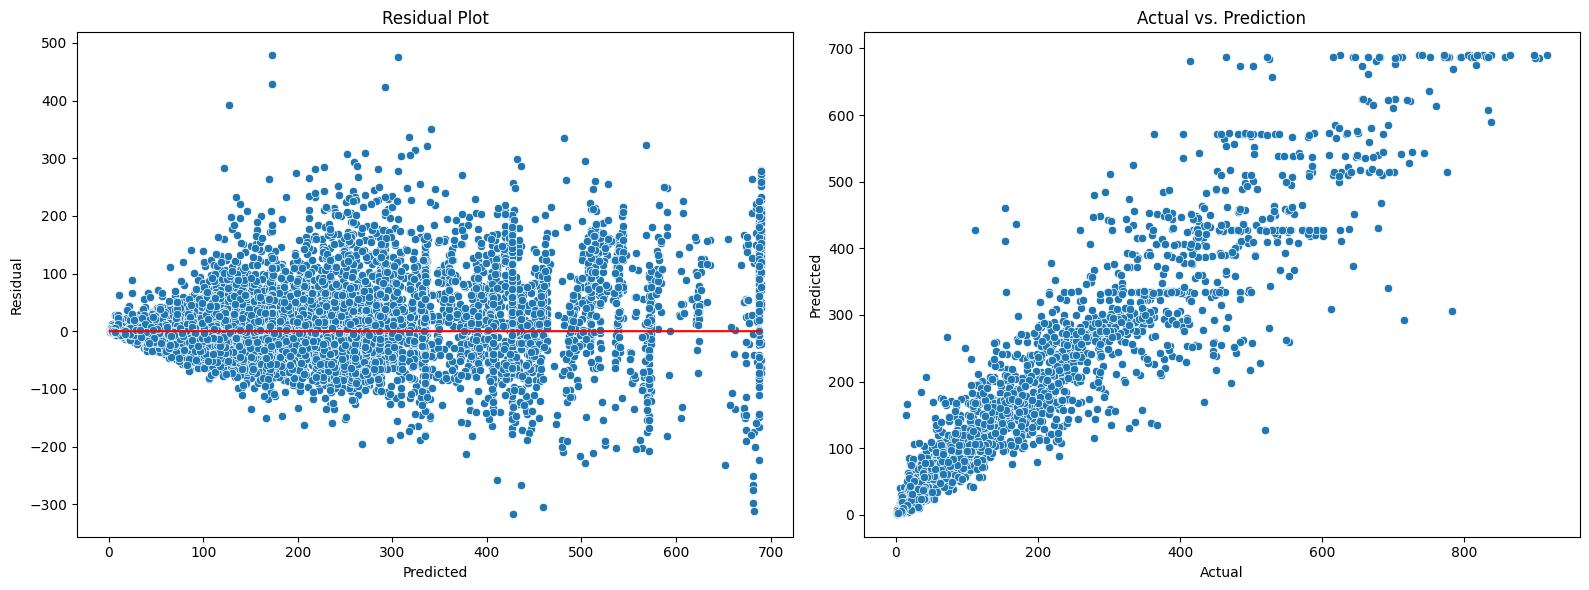

In [91]:
# Residual plot
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.scatterplot(data=df_result, x='yPred', y='residual').set(title='Residual Plot', xlabel='Predicted', ylabel='Residual')
sns.lineplot(data=df_result, x='yPred', y=0, color='r')

plt.subplot(1,2,2)
sns.scatterplot(x=ytest, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction', xlabel='Actual', ylabel='Predicted')
plt.tight_layout()

**Residual Plot**
- Berdasarkan Residual Plot polanya masih dapat terlihat dan terdapat bias error dikarenakan model ini memiliki nilai MAPE sebesar 22.7%

**Actual vs Prediction**
- berdasarkan plot actual vs prediction bahwa prediksi tersebut menghasilkan pola regresi yang jelas dan untuk prediksi diatas 400 masih terlihat polanya tetapi sudah mulai bias

### **FEATURED IMPORTANCE**

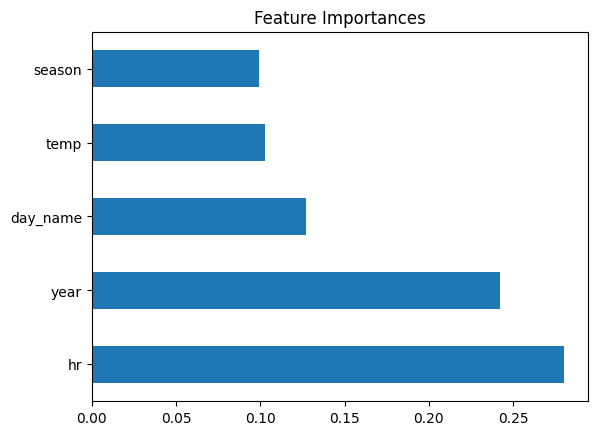

In [102]:
xgb.fit(xtrain, ytrain)


transformed_columns = xtrain.columns 

# Membuat Barplot Feature Importances
feature_imp = pd.Series(xgb.feature_importances_, index=transformed_columns).sort_values(ascending=False).head()
feature_imp.plot(kind='barh', title='Feature Importances')
plt.show()

- Berdasarkan Model XGBoost fitur yang paling mempengaruhi model XGBoost dalam mempelajari data adalah fitur season, temp, day_name, year dan hr.


## **CONCLUSION**

1. XGBoost Tuning dapat melakukan prediksi dengan kesalahan error berdasarkan MAPE sebesar 22.7% , dengan nilai RMSE disekitar 42.1 yang artinya didalam rentang prediksi di 1-970 jumlah kesalahan prediksinya ada disekitar angka 42 dan dengan nilai R Squared di 0.94 artinya adalah Model XGBoost ini sudah dapat menjelaskan variasi yang ada pada kolom target Y.

2. Paramater terbaik berdasarkan proses tuning pada model XGBoost adalah  'model__regressor__n_estimators': 139, 'model__regressor__max_depth': 'model__regressor__learning_rate': 0.16' 

3. Fitur yang paling mempengaruhi Model XGBoost pada Machine Learning adalah fitur 'season','temp,'day_name','year' dan 'hr'

## **IMPACT TO BUSINESS**

**Asumsi:**
- Harga sepeda baru adalah $300 per unit.
- Biaya perawatan atau maintenance sepeda adalah $50 per sepeda per tahun.
- Model Machine Learning dapat memprediksi jumlah pengguna sepeda dengan MAPE sebesar 22.7%.
- Sepeda yang dimiliki oleh Capital Bike Sharing adalah 1000 unit sepeda

**Dampak Finansial:**


Dengan hasil prediksi yang didapat dari Model Machine Learning dengan nilai MAPE sebesar 22.7% maka :

1. Capital Bike Sharing tidak harus membeli tambahan sepeda, namun, mereka dapat mengoptimalkan alokasi sepeda berdasarkan prediksi model.

2. Capital Bike Sharing dapat menyesuaikan persediaan sepeda di stasiun-stasiun berdasarkan permintaan yang diprediksi, mengurangi risiko kekurangan atau kelebihan sepeda.

3. Capital Bike Sharing dapat Mengoptimalkan jadwal pemeliharaan sepeda berdasarkan penggunaan yang diprediksi, mengurangi biaya perawatan yang tidak perlu.

Dengan menggunakan model Machine Learning, Capital Bike Sharing dapat memaksimalkan efisiensi operasional dan merencanakan ekspansi ke kota-kota baru dengan lebih baik, yang pada akhirnya dapat menghasilkan dampak finansial positif bagi perusahaan dengan catatan hasil prediksi bisa lebih bisa juga kurang dengan nilai kesalahan di 22.7%.

## **RECOMMENDATION**

Rekomendasi untuk memperbaiki model serta meningkatkan model:
1. Melakukan Hyperparameter Tuning dengan Gridsearch dengan mencoba berbagai kombinasi dari berbagai parameter yang ada pada model lebih banyak lagi.

2. mencoba lebih banyak model yang termasuk metode Ensemble seperti Voting Regressor dan Stacking Regressor.
- Voting Regressor: Voting Regressor menggabungkan beberapa model regresi (misalnya, Regresi Linier, Random Forest Regressor, dan XGBoost) dan memungkinkan model-model tersebut "memilih" prediksi terbaik. Ini dapat meningkatkan akurasi prediksi dengan mengurangi bias dan variasi.

- Stacking Regressor: Stacking Regressor adalah metode ensemble yang lebih canggih di mana beberapa model dasar berkontribusi pada prediksi, dan kemudian ada model meta yang mengambil hasil dari model dasar sebagai fitur masukan. Ini dapat meningkatkan kinerja dengan menggabungkan kelebihan dari beberapa model berbeda.

In [118]:
# import pickle
# pickle.dump(xgb_tuning, open('model_BikeSharing.pkl', 'wb'))